<a href="https://colab.research.google.com/github/emilybomber/Project-4/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.1'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,903 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,356 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restric

In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn as skl
import tensorflow as tf
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Project_4 /train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_df = train_df.drop(["Name", "Destination", "PassengerId", "Cabin"],1)
train_df.head(20)

<ipython-input-5-d06d077888d9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop(["Name", "Destination", "PassengerId", "Cabin"],1)


,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [ ]:
train_df.fillna(0.0, inplace=True)
train_df.head(20)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,28.0,False,0.0,0.0,0.0,0.0,0.0,True
8,Earth,False,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [ ]:
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
train_df[boolean_columns] = train_df[boolean_columns].astype(int)
train_df['HomePlanet'] = train_df['HomePlanet'].astype(str)
train_df['HomePlanet'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df.head(20)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
5,1,0,44.0,0,0.0,483.0,0.0,291.0,0.0,1
6,1,0,26.0,0,42.0,1539.0,3.0,0.0,0.0,1
7,1,1,28.0,0,0.0,0.0,0.0,0.0,0.0,1
8,1,0,35.0,0,0.0,785.0,17.0,216.0,0.0,1
9,2,1,14.0,0,0.0,0.0,0.0,0.0,0.0,1


Earth = 1 | Europa = 2 | Mars = 3

In [ ]:
# Split our preprocessed data into our features and target arrays
y = train_df['Transported'].values
X = train_df.drop(['Transported'], axis='columns').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 80
h1_2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                800       
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3261 (12.74 KB)
Trainable params: 3261 (12.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.7512
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7849
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7920
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7923
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7932
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7932
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7960
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7955
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.7958
Epoch 10/100
204/204 [==============================] - 1s 3ms/step - loss: 0.4248 - accura

<Axes: >

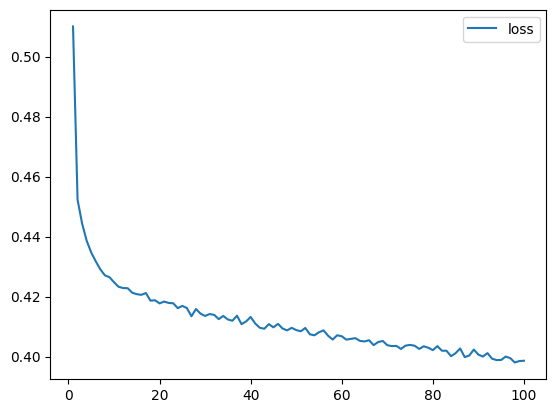

In [ ]:
# Create a DataFrame containing training history for the 1st attempt
training_hist = pd.DataFrame(fit_model.history)
training_hist.index += 1

# Plot the loss
training_hist.plot(y="loss")

<Axes: >

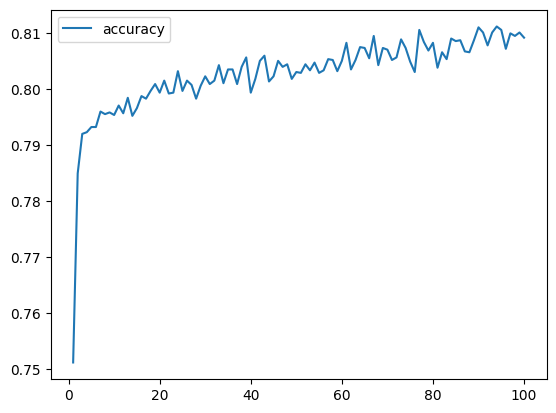

In [ ]:
# Plot the accuracy
training_hist.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

68/68 - 0s - loss: 0.4509 - accuracy: 0.7962 - 283ms/epoch - 4ms/step
Loss: 0.45090392231941223, Accuracy: 0.7962281703948975


In [ ]:
nn.save_weights("SpaceshipTitanic_nn_model.h5")

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=1), activation=activation, input_dim=9))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=1),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics="accuracy")

    return nn_model

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)


In [ ]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 88 Complete [00h 01m 25s]
val_accuracy: 0.8003680109977722

Best val_accuracy So Far: 0.8035878539085388
Total elapsed time: 00h 17m 38s

Search: Running Trial #89

Value             |Best Value So Far |Hyperparameter
sigmoid           |tanh              |activation
5                 |7                 |first_units
2                 |1                 |num_layers
2                 |2                 |units_0
5                 |6                 |units_1
4                 |4                 |units_2
6                 |6                 |units_3
1                 |4                 |units_4
5                 |10                |units_5
50                |50                |tuner/epochs
0                 |17                |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/50
204/204 [==============================] - 2s 4ms/step - loss: 0.7097 - accuracy: 0.4961 - val_loss: 0.6947 - val_accuracy: 0.497

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 7,
 'num_layers': 3,
 'units_0': 3,
 'units_1': 8,
 'units_2': 2,
 'units_3': 6,
 'units_4': 7,
 'units_5': 5,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0046'}

In [ ]:
model = tuner.hypermodel.build(best_hyper)
fit_model_best = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 5s 6ms/step - loss: 0.6742 - accuracy: 0.6133
Epoch 2/100
204/204 [==============================] - 1s 5ms/step - loss: 0.5940 - accuracy: 0.7348
Epoch 3/100
204/204 [==============================] - 1s 7ms/step - loss: 0.5614 - accuracy: 0.7520
Epoch 4/100
204/204 [==============================] - 2s 10ms/step - loss: 0.5447 - accuracy: 0.7604
Epoch 5/100
204/204 [==============================] - 2s 8ms/step - loss: 0.5323 - accuracy: 0.7638
Epoch 6/100
204/204 [==============================] - 1s 5ms/step - loss: 0.5224 - accuracy: 0.7684
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 0.5130 - accuracy: 0.7673
Epoch 8/100
204/204 [==============================] - 1s 5ms/step - loss: 0.5054 - accuracy: 0.7684
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7786
Epoch 10/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4719 - accur

<Axes: >

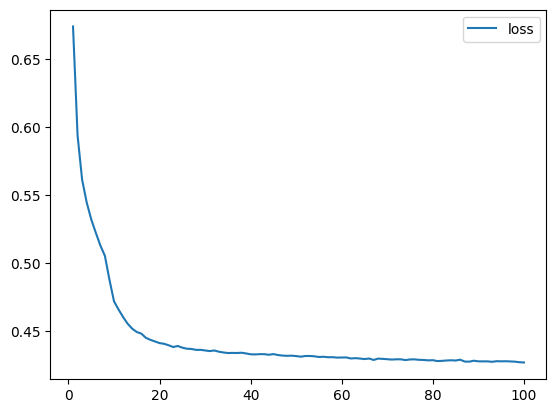

In [ ]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_best = pd.DataFrame(fit_model_best.history)
training_hist_best.index += 1

# Plot the loss
training_hist_best.plot(y="loss")

<Axes: >

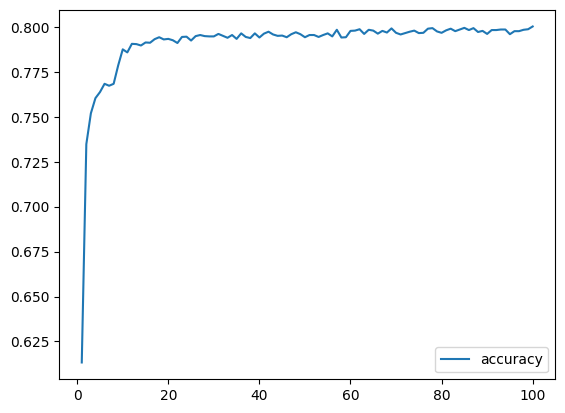

In [ ]:
# Plot the accuracy
training_hist_best.plot(y="accuracy")

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

68/68 - 0s - loss: 0.4626 - accuracy: 0.8040 - 432ms/epoch - 6ms/step
Loss: 0.4625595211982727, Accuracy: 0.8040478229522705


In [ ]:
best_model.save_weights("SpaceshipTitanicBestModel.h5")

In [ ]:
class_transport = train_df.sample(n=13)
class_transport.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8071,1,1,28.0,0,0.0,0.0,0.0,0.0,0.0,1
134,1,0,56.0,0,0.0,0.0,0.0,0.0,0.0,0
7772,3,1,12.0,0,0.0,0.0,0.0,0.0,0.0,1
4057,2,1,14.0,0,0.0,0.0,0.0,0.0,0.0,1
1035,3,0,18.0,0,787.0,0.0,106.0,1710.0,0.0,0


In [ ]:
X = class_transport.drop('Transported', axis=1)
y = class_transport['Transported']
X.to_numpy()
preds = nn.predict(X)
preds = np.where(preds > 0.5, 1, 0)
preds

1/1 [==============================] - 0s 108ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
class_transport['Dimensionally Transported'] = preds
class_transport['Name'] = ['Tyler Aden', 'Samantha Cook', 'Matthew Krueger', 'Aygyul Nardelli', 'Brian Miller', 'Dustin Syrjanen',
                  'Brandon Britt', 'Emily Bomber', 'Michael Hesprich', 'Irene Stephenson', 'Jacqueline Harrison', 'Jaime Langenfeld', 'Jasmin Morales']
class_transport = class_transport.drop('Transported', axis=1)

In [ ]:
mapping_1 = {1: 'Yes', 0: 'No'}
mapping_2 = {1: 'Earth', 2: 'Europa', 3: 'Mars'}

class_transport['Dimensionally Transported'] = class_transport['Dimensionally Transported'].map(mapping_1)
class_transport['CryoSleep'] = class_transport['CryoSleep'].map(mapping_1)
class_transport['VIP'] = class_transport['VIP'].map(mapping_1)
class_transport['HomePlanet'] = class_transport['HomePlanet'].map(mapping_2)

class_transport

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Dimensionally Transported,Name
8071,Earth,Yes,28.0,No,0.0,0.0,0.0,0.0,0.0,No,Tyler Aden
134,Earth,No,56.0,No,0.0,0.0,0.0,0.0,0.0,No,Samantha Cook
7772,Mars,Yes,12.0,No,0.0,0.0,0.0,0.0,0.0,Yes,Matthew Krueger
4057,Europa,Yes,14.0,No,0.0,0.0,0.0,0.0,0.0,Yes,Aygyul Nardelli
1035,Mars,No,18.0,No,787.0,0.0,106.0,1710.0,0.0,No,Brian Miller
8243,Earth,No,22.0,No,0.0,0.0,0.0,617.0,0.0,No,Dustin Syrjanen
6922,Europa,No,60.0,No,0.0,307.0,0.0,484.0,1967.0,No,Brandon Britt
2550,Mars,No,27.0,Yes,1709.0,4.0,24.0,0.0,0.0,No,Emily Bomber
6908,Earth,No,30.0,No,0.0,0.0,547.0,0.0,423.0,No,Michael Hesprich
8111,Earth,No,40.0,No,909.0,0.0,0.0,0.0,0.0,No,Irene Stephenson
